# Logestic Regresson from scratch 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../DataSets/linearly_separable_600.csv")
df.head()

,x1,x2,label
0,0.027862,0.547096,0
1,-0.503009,-0.607094,0
2,0.002622,0.023490,0
3,-0.739293,0.571877,0
4,-0.230319,0.528561,0


# From sklearn library 

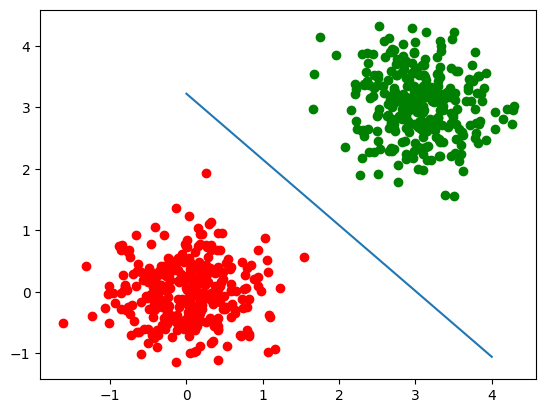

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# model = LogisticRegression(max_iter=1000)
# features = df[["x1","x2"]]
# target = df["label"]
# x_train = features[0:400][:]
# y_train = target[0:400]
# x_test = features[400:][:]
# y_test = target[400:]
# model.fit(x_train,y_train)
# conf_mt = confusion_matrix(y_test,model.predict(x_test))

# plt.scatter(df[df["label"] == 0]["x1"],df[df["label"] == 0]["x2"],color = "red")
# plt.scatter(df[df["label"] == 1]["x1"],df[df["label"] == 1]["x2"],color = "green")
# x = np.linspace(0, 4, 200)
# y = (-2.1530 * x + 6.482)/2.012
# plt.plot(x, y)
# plt.show()

# Perceptron Trick 

In [4]:
features = df[["x0","x1","x2"]]
target = df["label"]
x_train = features[0:400].values
y_train = target[0:400].values.reshape(-1,1)
x_test = features[400:].values
y_test = target[400:].values.reshape(-1,1)

KeyError: "['x0'] not in index"

In [ ]:
def simple_fun(z):
    return 1 if z >= 0 else 0

delta = 0.5
epochs = 2000

w = np.ones((x_train.shape[1],1))
for epoch in range(epochs):
    i = np.random.randint(0, x_train.shape[0])
    
    pred = simple_fun(np.dot(x_train[i], w))
    
    w += delta * (y_train[i] - pred) * x_train[i].reshape(-1, 1)

print(w)
plt.scatter(df[df["label"] == 0]["x1"],df[df["label"] == 0]["x2"],color = "red")
plt.scatter(df[df["label"] == 1]["x1"],df[df["label"] == 1]["x2"],color = "green")
x = np.linspace(0, 4, 200)
y = (-w[1][0] * x - w[0][0])/w[2][0]
plt.plot(x, y)
plt.show()

# Sigmoidal function 

In [ ]:
def sig_fun(z):
    return 1/(1 + np.exp(-z))

delta = 0.5
epochs = 2000

w = np.ones((x_train.shape[1],1))
for epoch in range(epochs):
    i = np.random.randint(0, x_train.shape[0])
    
    pred = sig_fun(np.dot(x_train[i], w))
    w += delta * (y_train[i] - pred) * x_train[i].reshape(-1, 1)
print(w)
plt.scatter(df[df["label"] == 0]["x1"],df[df["label"] == 0]["x2"],color = "red")
plt.scatter(df[df["label"] == 1]["x1"],df[df["label"] == 1]["x2"],color = "green")
x = np.linspace(0, 4, 200)
y = (-w[1][0] * x - w[0][0])/w[2][0]
plt.plot(x, y)
plt.show()

# Gradient Descent 

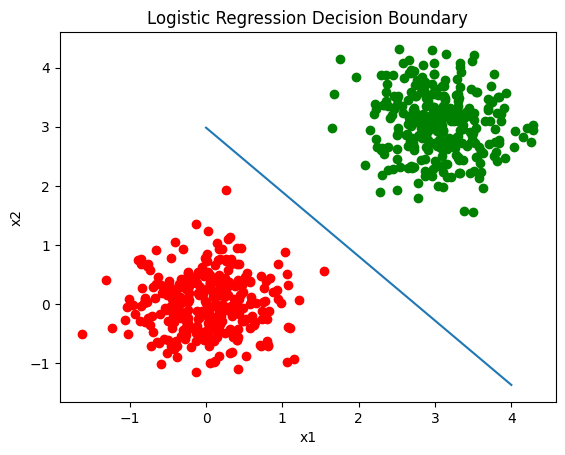

In [ ]:
class Logistic_Regressor:
    def __init__(self, max_iter=1000, alpha=0.01):
        self.iter = max_iter
        self.alpha = alpha

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((ones, x_train))
        
        y_train = y_train.reshape(-1, 1)
        
        self.w = np.zeros((x_train.shape[1], 1))
        
        for _ in range(self.iter):
            y_pred = self.sigmoid(x_train @ self.w)
            grad = x_train.T @ (y_train - y_pred)
            self.w += self.alpha * grad / len(y_train)

    def predict(self, x_test):
        ones = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((ones, x_test))
        
        y_pred = self.sigmoid(x_test @ self.w)
        return (y_pred >= 0.5).astype(int)
    
    def getCoeff(self):
        return self.w


features = df[["x1","x2"]]
target = df["label"]
x_train = features[0:400].values
y_train = target[0:400].values.reshape(-1,1)
x_test = features[400:].values
y_test = target[400:].values.reshape(-1,1)


model = Logistic_Regressor(max_iter=2000,alpha=0.35)
model.fit(x_train,y_train)
w = model.getCoeff()

plt.scatter(df[df["label"] == 0]["x1"],df[df["label"] == 0]["x2"],color = "red")
plt.scatter(df[df["label"] == 1]["x1"],df[df["label"] == 1]["x2"],color = "green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
x = np.linspace(0, 4, 200)
y = (-w[1][0] * x - w[0][0])/w[2][0]
plt.plot(x, y)
plt.show()

In [ ]:
y_pred = model.predict(x_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


# scipy model parameters 
***Intercept** :  -6.482537
**Cofficients**: 2.1530885 , 2.01243785*

# perceptron trick model parameters 
***Intercept** :  -2. 
**Cofficients**: 0.97005776 , 0.17346311*

# perceptron trick with sigmoid function model parameters 
***Intercept** :  -7.0517141 
**Cofficients**: 2.64350316 , 2.36270606*

# Gradient descent with sigmoid function model parameters 
***Intercept** :  -7.11443268
**Cofficients**: 2.58078458, 2.29998748*